## 2.1 Problem statement. Machine Learning 1:

### What are the three stages to build the hypotheses or model in machine learning?

Model building
Model testing
Applying the model

### What is the standard approach to supervised learning?

The standard approach is to split the dataset into Train and test dataset.

### What is Training set and Test set?

Training dataset is used to construct a model (As the name inplies, we use this to train our model). Whereas a test data set is used to validate our model. We have to normally re run our model on these datasets multiple times so that we can ensure that we are not over fitting our model.

### What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

1) Ensemble method combines the predictions of several models with respect to an algorithm in order to improve robustness over a single model.Ensemble model combines multiple diverse models together and provides an optimized solution on prediction.

2) The technique of bagging is used in ensemble to improve the estimation of classification. we create random samples of the training data set (sub sets of training data set). Then, we build a classifier for each sample. Finally, results of these multiple classifiers are combined using average or majority voting. Bagging helps to reduce the variance error.

3) Boosting provides sequential learning of the predictors. The first predictor is learned on the whole data set, while the following are learnt on the training set based on the performance of the previous one. It starts by classifying original data set and giving equal weights to each observation. Boosting provides better accuracy than bagging.

### How can you avoid overfitting?

1) Cross-Validation : One sample as in-time validation and rest for training the model. High fold cross validation is used for lower variance.

2) Early Stopping : Limits the number of iterations.

3) Pruning : Removes the fields which adds little value for prediction.

4) Regularization :  It tries to push the coefficients for many variables to zero and hence reduce cost term.


## 2.2 Problem statement. Machine Learning 2:

In [3]:
# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline 

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
# Understanding the dataset
print(type(boston))
print(boston.data.shape)
print(boston.keys())
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>
(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of access

In [5]:
bos_x = pd.DataFrame(boston.data,columns=boston.feature_names)
print(bos_x.head())
# Price is the target value here
bos_y = pd.DataFrame(boston.target)
print(bos_y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


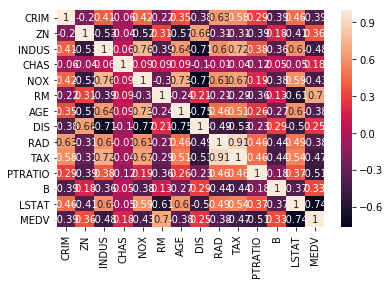

In [6]:
# Using a heat map to identify the co-relation between the two variables
boss_corr = pd.DataFrame(boston.data,columns=boston.feature_names)
# creating a new variable to include the target variable as well
boss_corr['MEDV'] = boston.target
correlation_matrix = boss_corr.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
# From the heatmap, we could infer that RAD<->TAX(Possitively correlated) AGE<->DIS(Negatively correlated) are highly correlated with each other.

In [8]:
# We drop the below columns as they are highly correlated to each other
bos_x.drop(['RAD','TAX','AGE','DIS'],axis=1)
regr = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(bos_x,bos_y,test_size=0.2,random_state=4)

Coefficients:   [[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]
Intercept:  [35.55487454]
MSE:  21.197139922226427
The root mean squared value(RMSE) is :  4.604035178213393
The variance score is :  0.7415244219726307


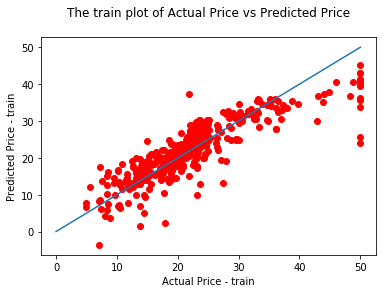

In [9]:
# Building a linear regression model on train dataset
train = regr.fit(x_train,y_train)
print("Coefficients:  ",regr.coef_)
print("Intercept: ",regr.intercept_)
train_pred = regr.predict(x_train)
# Calculating the mean squared value
mse = mean_squared_error(y_train, train_pred)
print("MSE: ",mse)
print("The root mean squared value(RMSE) is : ",np.sqrt(mse))
# Calculating the variance score
print("The variance score is : ",regr.score(x_train,y_train))
# Obataining 74 percentage on the train dataset
plt.scatter(y_train,train_pred,color="red")
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - train")
plt.ylabel("Predicted Price - train")
plt.title("The train plot of Actual Price vs Predicted Price\n")
plt.show()

Coefficients:   [[-7.88999464e-02  4.40387143e-02  1.01246593e-01  1.59586216e+00
  -2.21483437e+01  3.39761682e+00  4.65548213e-02 -1.16774905e+00
   3.95253128e-01 -1.15586623e-02 -1.12572311e+00  1.21916201e-02
  -7.83137748e-01]]
Intercept:  [40.71750843]
MSE:  21.970706601803542
The root mean squared value(RMSE) is :  4.687292032912345
The variance score is :  0.7634741084483261


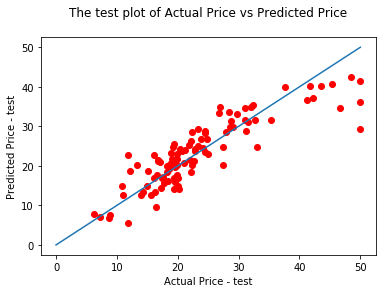

In [10]:
# Building a linear regression model on test dataset
test = regr.fit(x_test,y_test)
print("Coefficients:  ",regr.coef_)
print("Intercept: ",regr.intercept_)
test_pred = regr.predict(x_test)
# Calculating the mean squared value
mse = mean_squared_error(y_test, test_pred)
print("MSE: ",mse)
print("The root mean squared value(RMSE) is : ",np.sqrt(mse))
# Calculating the variance score
print("The variance score is : ",regr.score(x_test,y_test))
# Obataining 76 percentage on the test dataset
plt.scatter(y_test,test_pred,color="red")
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - test")
plt.ylabel("Predicted Price - test")
plt.title("The test plot of Actual Price vs Predicted Price\n")
plt.show()